In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential

In [ ]:
df = pd.read_csv('/content/concertriccir2.csv')

In [ ]:
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [ ]:
df = df.rename(columns = {'7.003345706103683010e-01':'x','-2.470675778972781789e-01':'y','0.000000000000000000e+00':'class'})

In [ ]:
df.head()

,x,y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


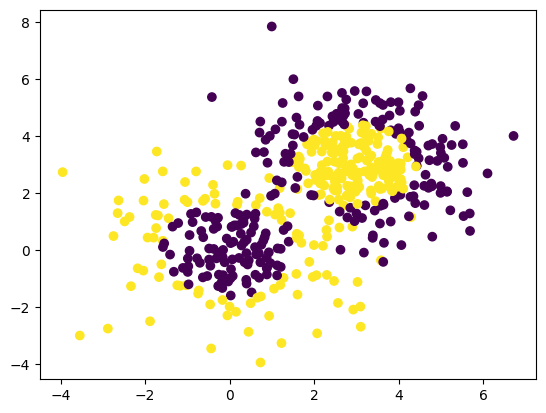

In [ ]:
plt.scatter(df['x'],df['y'],c=df['class'])

In [ ]:
x = df.drop(columns =['class'],axis=1)
y = df['class']

In [ ]:
print(x)

            x         y
0   -3.950019  2.740080
1    0.150222 -2.157638
2   -1.672050 -0.941519
3    2.560483 -1.846577
4   -1.724979  3.463930
..        ...       ...
494  2.177895  2.984489
495  1.778905  2.869205
496  0.894180  3.069959
497  0.849439  3.875435
498  5.217443  1.400818

[499 rows x 2 columns]


In [ ]:
print(y)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
494    1.0
495    1.0
496    0.0
497    0.0
498    0.0
Name: class, Length: 499, dtype: float64


In [ ]:
# model training without batch normalization
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=2))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history1 = model.fit(x,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4477 - loss: 0.9238 - val_accuracy: 0.4700 - val_loss: 0.8505
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4218 - loss: 0.9063 - val_accuracy: 0.4600 - val_loss: 0.8186
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4104 - loss: 0.8522 - val_accuracy: 0.4500 - val_loss: 0.7903
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3685 - loss: 0.8599 - val_accuracy: 0.4300 - val_loss: 0.7652
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3686 - loss: 0.7998 - val_accuracy: 0.4200 - val_loss: 0.7449
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3618 - loss: 0.7693 - val_accuracy: 0.3800 - val_loss: 0.7261
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3586 - loss: 0.7607 - val_accuracy: 0.3900 - val_loss: 0.7103
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4058 - loss: 0.7493 - val_accuracy: 0.3900 -

In [ ]:
# model training with batch normalization
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history2 = model.fit(x,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3611 - loss: 0.9718 - val_accuracy: 0.5100 - val_loss: 0.8905
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3550 - loss: 0.9941 - val_accuracy: 0.5500 - val_loss: 0.8688
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3645 - loss: 1.0029 - val_accuracy: 0.5900 - val_loss: 0.8565
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4021 - loss: 0.9287 - val_accuracy: 0.5400 - val_loss: 0.8476
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4280 - loss: 0.8750 - val_accuracy: 0.4900 - val_loss: 0.8417
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3870 - loss: 0.8938 - val_accuracy: 0.3800 - val_loss: 0.8352
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4212 - loss: 0.8818 - val_accuracy: 0.3400 - val_loss: 0.8349
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3819 - loss: 0.9112 - val_accuracy: 0.3500

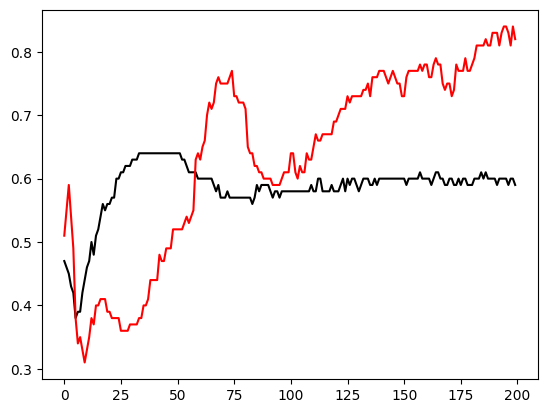

In [ ]:
# comparision between history1 and history2
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='red')